# Big Data Mart Sales Problem

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

let load the Big Data mart

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#lets load the Bigmart Data
test=pd.read_csv('Big_mart_test.csv')
train=pd.read_csv('big_mart_train.csv')

In [3]:
#loading test data
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [4]:
#loading train data
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [5]:
train['source']='train'
test['source']='test'
test['Item_Outlet_Sales']= 0
data=pd.concat([test,train],ignore_index=True)
print(train.shape,test.shape,data.shape)

(8523, 13) (5681, 13) (14204, 13)


In [6]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,source,Item_Outlet_Sales
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,test,0.0000
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,test,0.0000
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,test,0.0000
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,test,0.0000
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,test,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,train,2778.3834
14200,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,train,549.2850
14201,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,train,1193.1136
14202,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,train,1845.5976


In [7]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
source                          0
Item_Outlet_Sales               0
dtype: int64

In [8]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.792854,0.065953,141.004977,1997.830681,1308.865489
std,4.652502,0.051459,62.086938,8.371664,1699.791423
min,4.555000,0.000000,31.290000,1985.000000,0.000000
25%,8.710000,0.027036,94.012000,1987.000000,0.000000
50%,12.600000,0.054021,142.247000,1999.000000,559.272000
75%,16.750000,0.094037,185.855600,2004.000000,2163.184200
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
#lets check the datatypes
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
source                        object
Item_Outlet_Sales            float64
dtype: object

Text(0.5, 1.0, 'Outlet_Establishment_Year vs. Item_Outlet_Sales')

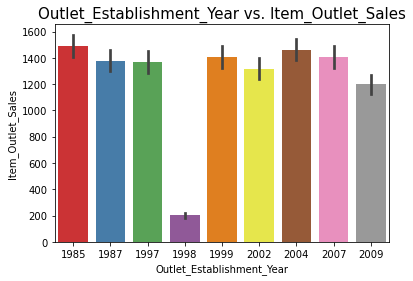

In [10]:
# lets check the Item_outlet_sales based on outlet_establishment_year
FC=sns.barplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', data=data, palette="Set1")
FC.set_title("Outlet_Establishment_Year vs. Item_Outlet_Sales", fontsize=15)

In [11]:
#lets start figure item_outlet sales_based on different prameter like outlet size,outlet location type,outlet type

Item_outlet_size vs Item_outlet_sales 
 
 Outlet_Size               High       Medium        Small
Item_Outlet_Sales  1379.693225  1608.962125  1147.289497


outlet_location_type vs Item_outlet_sales 
 
 Outlet_Location_Type       Tier 1       Tier 2       Tier 3
Item_Outlet_Sales     1126.145495  1394.594636  1367.858254


outlet_type vs Item_outlet_sales 
 
                    Item_Outlet_Sales
Outlet_Type                         
Grocery Store             203.897100
Supermarket Type1        1389.858216
Supermarket Type2        1197.815543
Supermarket Type3        2215.475338




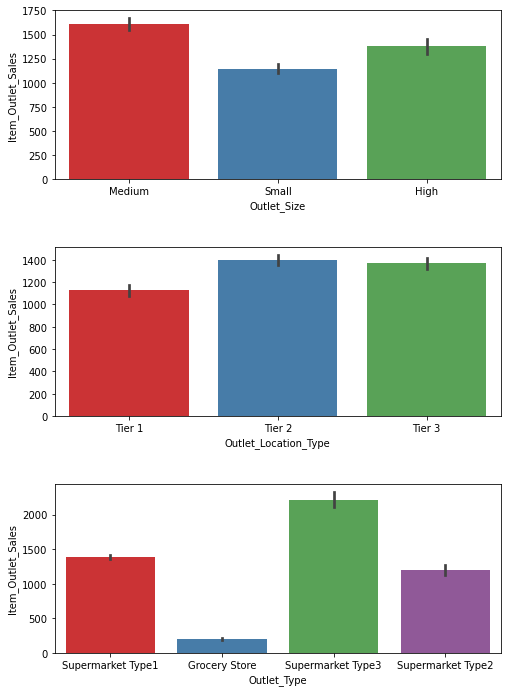

In [12]:
plt.figure(figsize = (8,7)) 

plt.subplot(311)
sns.barplot(x='Outlet_Size', y='Item_Outlet_Sales', data=data, palette="Set1")
Item_outlet_sales_asper_size = pd.DataFrame(data.groupby('Outlet_Size')['Item_Outlet_Sales'].mean()).T
print('Item_outlet_size vs Item_outlet_sales','\n','\n',Item_outlet_sales_asper_size)
print('\n')

plt.subplot(312)
sns.barplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=data, palette="Set1")

Item_outlet_sales_asper_location = pd.DataFrame(data.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].mean()).T
print('outlet_location_type vs Item_outlet_sales','\n','\n',Item_outlet_sales_asper_location)
print('\n')

plt.subplot(313)
sns.barplot(x='Outlet_Type', y='Item_Outlet_Sales', data=data, palette="Set1")

Item_outlet_sales_asper_type = pd.DataFrame(data.groupby('Outlet_Type')['Item_Outlet_Sales'].mean())
print('outlet_type vs Item_outlet_sales','\n','\n',Item_outlet_sales_asper_type)
print('\n')

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 1.4)

plt.show()


In [13]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular', 'low fat':'Low Fat'})
data['Item_Fat_Content'].value_counts()
# we can see we replaced reg amd Lf with Low Fat and Regular

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [14]:
#lets start figure item_outlet sales based on different prameter like Outlet_Identifier,Item_Type,Item_Fat_Content

Outlet_Identifier vs Item_outlet_sales 
 
                    Item_Outlet_Sales
Outlet_Identifier                   
OUT010                    203.610997
OUT013                   1379.693225
OUT017                   1404.708551
OUT018                   1197.815543
OUT019                    204.197834
OUT027                   2215.475338
OUT035                   1463.305120
OUT045                   1315.714132
OUT046                   1366.706560
OUT049                   1409.012781


Item_Type vs Item_outlet_sales 
 
                        Item_Outlet_Sales
Item_Type                               
Baking Goods                 1165.308787
Breads                       1329.897088
Breakfast                    1248.919095
Canned                       1332.243074
Dairy                        1340.311665
Frozen Foods                 1280.318926
Fruits and Vegetables        1400.923903
Hard Drinks                  1264.622727
Health and Hygiene           1218.181979
Household                

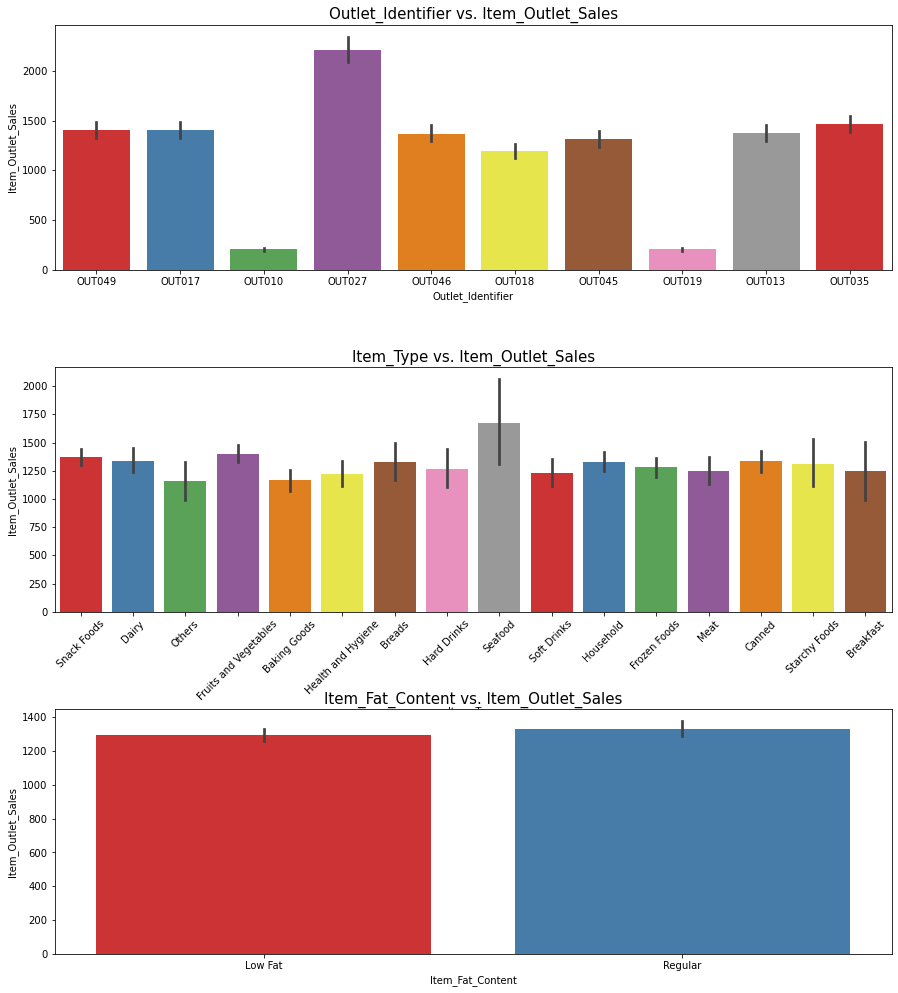

In [15]:
plt.figure(figsize = (15,12)) 

plt.subplot(311)
OI=sns.barplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=data, palette="Set1")
OI.set_title("Outlet_Identifier vs. Item_Outlet_Sales", fontsize=15)
Item_outlet_sales_asper_outlet_identifier = pd.DataFrame(data.groupby('Outlet_Identifier')['Item_Outlet_Sales'].mean())
print('Outlet_Identifier vs Item_outlet_sales','\n','\n',Item_outlet_sales_asper_outlet_identifier)
print('\n')

plt.subplot(312)
IS=sns.barplot(x='Item_Type', y='Item_Outlet_Sales', data=data, palette="Set1")
IS.set_title("Item_Type vs. Item_Outlet_Sales", fontsize=15)
Item_outlet_sales_asper_Item_Type = pd.DataFrame(data.groupby('Item_Type')['Item_Outlet_Sales'].mean())
print('Item_Type vs Item_outlet_sales','\n','\n',Item_outlet_sales_asper_Item_Type)
plt.setp(IS.get_xticklabels(), rotation=45) #Rotating the xlabel so that we can see whats written.
plt.subplots_adjust(wspace = 0.1, hspace = 0.4,top = 1.2)

plt.subplot(313)
FC=sns.barplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=data, palette="Set1")
FC.set_title("Item_Fat_Content vs. Item_Outlet_Sales", fontsize=15)
Item_outlet_sales_asper_Item_Fat_Content = pd.DataFrame(data.groupby('Item_Fat_Content')['Item_Outlet_Sales'].mean())
print('Item_Fat_Content vs Item_outlet_sales','\n','\n',Item_outlet_sales_asper_Item_Fat_Content)
print('\n')


print('\n')


# Determine the years of operation of a store
lets make a column showing year of operation we know the data scietist have collected this report in the year of 2013
so lets check the year of operation before 2013 for just passed the below code

In [16]:
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe().T
# the operation of outlet ranging from 4 to 28 years we can see below.

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

# Null Value
we have found that Item_weight and Outlet_size having null values. lets treat those null values.


In [17]:
# lets fill the Item_weight missing value with Mean of Item_weight columns
data['Item_Weight']=data['Item_Weight'].replace(np.NaN,data['Item_Weight'].mean())

In [18]:
#lets fill the outlet_size with the most frequent data
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='most_frequent')
data['Outlet_Size']=imp.fit_transform(data['Outlet_Size'].values.reshape(-1,1)) # reshape is just to neglect any error value
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,source,Item_Outlet_Sales,Outlet_Years
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,test,0.0000,14
1,FDW14,8.300000,Regular,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1,test,0.0000,6
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,test,0.0000,15
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1,test,0.0000,6
4,FDY38,12.792854,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,test,0.0000,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDF22,6.865000,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,train,2778.3834,26
14200,FDS36,8.380000,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,train,549.2850,11
14201,NCJ29,10.600000,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,train,1193.1136,9
14202,FDN46,7.210000,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,train,1845.5976,4


In [19]:
#Get the first two characters of ID:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [20]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in mod:
    data[i] = le.fit_transform(data[i])

In [21]:
#Drop the columns which have been converted to different types:
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

data # save this data for EDA process

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,source,Item_Outlet_Sales,Outlet_Years,Item_Type_Combined,Outlet
0,FDW58,20.750000,0,0.007565,107.8622,OUT049,1,0,1,test,0.0000,14,1,9
1,FDW14,8.300000,1,0.038428,87.3198,OUT017,1,1,1,test,0.0000,6,1,2
2,NCN55,14.600000,0,0.099575,241.7538,OUT010,1,2,0,test,0.0000,15,2,0
3,FDQ58,7.315000,0,0.015388,155.0340,OUT017,1,1,1,test,0.0000,6,1,2
4,FDY38,12.792854,1,0.118599,234.2300,OUT027,1,2,3,test,0.0000,28,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDF22,6.865000,0,0.056783,214.5218,OUT013,0,2,1,train,2778.3834,26,1,1
14200,FDS36,8.380000,1,0.046982,108.1570,OUT045,1,1,1,train,549.2850,11,1,7
14201,NCJ29,10.600000,0,0.035186,85.1224,OUT035,2,1,1,train,1193.1136,9,2,6
14202,FDN46,7.210000,1,0.145221,103.1332,OUT018,1,2,2,train,1845.5976,4,1,3


# lets build the model for various regression algorithm

In [22]:
# taking train data to train the model
new=train

In [23]:
#checking for any null value are present or not
new.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
dtype: int64

In [24]:
# lets fill the Item_weight missing value with Mean of Item_weight columns
new['Item_Weight']=new['Item_Weight'].replace(np.NaN,new['Item_Weight'].mean())

In [25]:
#lets fill the outlet_size with the most frequent data
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='most_frequent')
new['Outlet_Size']=imp.fit_transform(new['Outlet_Size'].values.reshape(-1,1)) # reshape is just to neglect any error value
new.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
source                       0
dtype: int64

In [26]:
# w have 4 columns in th item fat content lets make change and make it 2 data i.e low fat and regular
new['Item_Fat_Content'] = new['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular', 'low fat':'Low Fat'})
new['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [27]:
new #checking the new data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,train
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850,train
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,train
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,train


In [28]:
# treating the categorical data and convert it numerical for model buiding.
mod = ['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Location_Type','Outlet_Size','Outlet_Type']
le = LabelEncoder()
for i in mod:
    new[i] = le.fit_transform(new[i])

In [29]:
new # my all data has been changed to numerical

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,156,9.300,0,0.016047,4,249.8092,9,4,1,0,1,3735.1380,train
1,8,5.920,1,0.019278,14,48.2692,3,8,1,2,2,443.4228,train
2,662,17.500,0,0.016760,10,141.6180,9,4,1,0,1,2097.2700,train
3,1121,19.200,1,0.000000,6,182.0950,0,3,1,2,0,732.3800,train
4,1297,8.930,0,0.000000,9,53.8614,1,1,0,2,1,994.7052,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1,0,2,1,2778.3834,train
8519,897,8.380,1,0.046982,0,108.1570,7,5,1,1,1,549.2850,train
8520,1357,10.600,0,0.035186,8,85.1224,6,6,2,1,1,1193.1136,train
8521,681,7.210,1,0.145221,13,103.1332,3,8,1,2,2,1845.5976,train


In [30]:
new.corr() #checking co-relation of data.

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.044518,-0.114660,-0.025482,-0.017973,0.012853,-0.008602,-0.014288,0.001389,0.003656,-0.001178,0.002869
Item_Weight,0.044518,1.000000,-0.021157,-0.012049,0.028015,0.024756,-0.007975,-0.007489,-0.007225,0.004088,-0.000566,0.011550
Item_Fat_Content,-0.114660,-0.021157,1.000000,0.047314,-0.139434,0.006063,0.000764,0.002447,-0.000622,-0.001598,0.002199,0.018719
Item_Visibility,-0.025482,-0.012049,0.047314,1.000000,-0.035249,-0.001315,-0.100439,-0.082927,0.069309,-0.028099,-0.173468,-0.128625
Item_Type,-0.017973,0.028015,-0.139434,-0.035249,1.000000,0.032651,0.001656,0.006527,-0.001859,0.003084,0.003053,0.017048
Item_MRP,0.012853,0.024756,0.006063,-0.001315,0.032651,1.000000,0.003319,0.004162,0.006059,0.000232,-0.001975,0.567574
Outlet_Identifier,-0.008602,-0.007975,0.000764,-0.100439,0.001656,0.003319,1.000000,-0.030969,0.504603,-0.716176,0.099873,0.162325
Outlet_Establishment_Year,-0.014288,-0.007489,0.002447,-0.082927,0.006527,0.004162,-0.030969,1.000000,0.070786,0.042005,-0.040040,-0.025525
Outlet_Size,0.001389,-0.007225,-0.000622,0.069309,-0.001859,0.006059,0.504603,0.070786,1.000000,-0.614311,-0.201483,-0.086182
Outlet_Location_Type,0.003656,0.004088,-0.001598,-0.028099,0.003084,0.000232,-0.716176,0.042005,-0.614311,1.000000,0.467219,0.089367


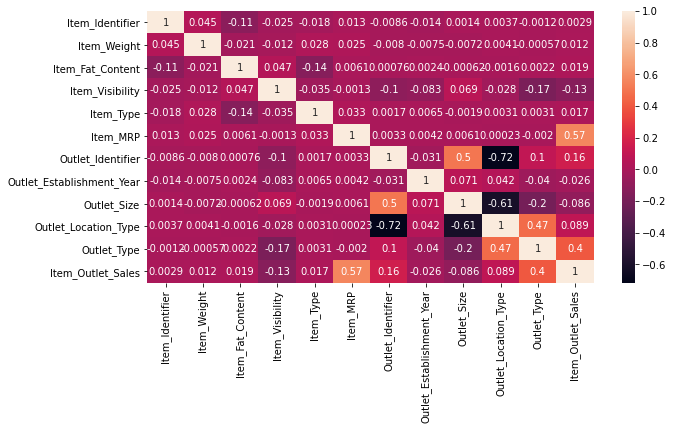

In [31]:
plt.figure(figsize=(10,5))
sns.heatmap(new.corr(),annot=True)
# we can observe the the visulaisation of different corelation of data

In [32]:
# lets drop the column which is not so impacting my target variable
new=new.drop(['Item_Identifier','Item_Weight','Item_Fat_Content','Outlet_Location_Type','source'],axis=1)

In [33]:
# checking skewed data because my data i not following normal distribution and not properly scaled also
new.skew()

Item_Visibility              1.167091
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Identifier           -0.059861
Outlet_Establishment_Year    0.034270
Outlet_Size                 -0.087072
Outlet_Type                  0.927438
Item_Outlet_Sales            1.177531
dtype: float64

In [34]:
# lets apply log transformation to make the data countable for normal ditribution
import numpy as np
for col in new.columns:
    if new.skew().loc[col]>0.55:
        new[col]=np.log1p(new[col])

In [35]:
# we can observe some of our data has scaled a bit better than previous one lets use this data
new.skew()

Item_Visibility              1.015334
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Identifier           -0.059861
Outlet_Establishment_Year    0.034270
Outlet_Size                 -0.087072
Outlet_Type                 -0.236040
Item_Outlet_Sales           -0.882266
dtype: float64

In [36]:
# lets check the outliers present in the data sets
from scipy.stats import zscore
z_score=abs(zscore(new))
print(new.shape)
new_final=new.loc[(z_score<3).all(axis=1)]
print(new_final.shape)
# we can see there were outliers present in the datasets

(8523, 8)
(8381, 8)


In [37]:
# seperating the input/output variables
df_x=new_final.drop(['Item_Outlet_Sales'],axis=1) #input variable
y=pd.DataFrame(new_final['Item_Outlet_Sales']) #target variable

In [38]:
# lets scale the input variable
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)
x
# WE CAN NOTICE OUR DATA IS BEEN SCALED.

,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Type
0,-1.027147,-0.766527,1.744757,1.496421,0.061819,-0.274111,-0.125802
1,-0.954731,1.609837,-1.506478,-0.623509,1.528500,-0.274111,1.026449
2,-1.011151,0.659291,-0.000579,1.496421,0.061819,-0.274111,-0.125802
3,-1.390267,-0.291254,0.652395,-1.683474,-0.304851,-0.274111,-2.095590
4,-1.390267,0.421655,-1.416265,-1.330152,-1.038192,-1.941256,-0.125802
...,...,...,...,...,...,...,...
8376,-0.130522,1.372201,1.175502,-1.330152,-1.038192,-1.941256,-0.125802
8377,-0.343049,-1.717072,-0.540370,0.789778,0.428489,-0.274111,-0.125802
8378,-0.601494,0.184019,-0.911964,0.436456,0.795160,1.393034,-0.125802
8379,1.702596,1.372201,-0.621414,-0.623509,1.528500,-0.274111,1.026449


In [39]:
#lets apply regression to datasets
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,x,y): #Def is used such that we can call it later
    max_r_score=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print()
    print('max r2 score correponding to',final_r_state,'is',max_r_score)
    return final_r_state

In [40]:
#APLLYING LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
r_state=maxr2_score(lreg,x,y)


max r2 score correponding to 80 is 0.6407326763482053


In [41]:
from sklearn.model_selection import cross_val_score
print('mean cross val score for linear regresion:',cross_val_score(lreg,x,y,cv=10,scoring='r2').mean())
print('standard deviation in r2 score for Linear Regression',cross_val_score(lreg,x,y,cv=10,scoring='r2').mean())

mean cross val score for linear regresion: 0.6021140741476778
standard deviation in r2 score for Linear Regression 0.6021140741476778


In [42]:
# lets apply grid search cv bacuase the r2_score we are getting very less,lets apply KNeighbors
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors={'n_neighbors':range(1,30)}
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
knr=KNeighborsRegressor()
gknr=GridSearchCV(knr,neighbors,cv=10)
gknr.fit(x_train,y_train)
gknr.best_params_

{'n_neighbors': 28}

In [43]:
knr=KNeighborsRegressor(n_neighbors=28)
r_state=maxr2_score(knr,x,y)


max r2 score correponding to 80 is 0.7156069518657837


In [44]:
from sklearn.model_selection import cross_val_score
print('mean cross val score for KNN regression:',cross_val_score(knr,x,y,cv=5,scoring='r2').mean())
print('standard deviation in r2 score for KNN Regression',cross_val_score(knr,x,y,cv=5,scoring='r2').std())

mean cross val score for KNN regression: 0.6941325158445885
standard deviation in r2 score for KNN Regression 0.011078364811761403


In [45]:
# lets apply lasso regression
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={'alpha':[0.0001,0.001,0.01,0.1,1]}
clf=GridSearchCV(lsreg,parameters,cv=10)
clf.fit(df_x,y)
clf.best_params_

{'alpha': 0.0001}

In [46]:
lsreg=Lasso(alpha=0.0001)
r_state=maxr2_score(lsreg,df_x,y)


max r2 score correponding to 80 is 0.6407397220011262


In [47]:
# lets use cross val score with lasso
print('mean cros val score for lasso regression:',cross_val_score(lsreg,df_x,y,cv=5,scoring='r2').mean())
print('standard deviation in r2 score for lasso Regression',cross_val_score(lsreg,df_x,y,cv=5,scoring='r2').std())
# based on the below output we can say that lasso performed just like LInearRegression

mean cros val score for lasso regression: 0.6020984281166749
standard deviation in r2 score for lasso Regression 0.013170951416802391


In [48]:
# now we will use gradient boosting technique
# for getting best set of parameter we will use grid search
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings('ignore')
gbr=GradientBoostingRegressor()
parameters={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,100,500,100]} 
# use n_estimator with step of 50
clf=GridSearchCV(gbr,parameters,cv=5)
clf.fit(x_train,y_train)
clf.best_params_


{'learning_rate': 0.01, 'n_estimators': 500}

In [49]:
gbr=GradientBoostingRegressor(learning_rate= 0.01, n_estimators= 500)
r_state=maxr2_score(gbr,x,y)


max r2 score correponding to 80 is 0.732733704759569


In [50]:
# now we will use cross val score to check the mean r2_score and standard deviation
print('mean r2 score for GBR regression:',cross_val_score(gbr,x,y,cv=5,scoring='r2').mean())
print('standard deviation in r2 score for GBR Regression',cross_val_score(gbr,x,y,cv=5,scoring='r2').std())

mean r2 score for GBR regression: 0.7122663054694373
standard deviation in r2 score for GBR Regression 0.010251971882132067


In [54]:
# so we tried all the model and come to conclusion that gradient boosting is working well among all
# random_state corresponding to highest r2_score is 80
x_train,x_test,y_train,y_test=train_test_split(df_x,y,random_state=80,test_size=0.20)
gbr=GradientBoostingRegressor(learning_rate= 0.01, n_estimators= 500)
gbr.fit(x_train,y_train)
y_pred=gbr.predict(x_test)

In [55]:
#lets find out r2 and RMSE score usin sklearn.metrics
import numpy as np
from sklearn.metrics import r2_score,mean_squared_error
print('mean cross val score for GBR regression:',cross_val_score(gbr,df_x,y,cv=5,scoring='r2').mean())
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))
print('r2_score is: ',r2_score(y_test,y_pred))

mean cross val score for GBR regression: 0.7122774741123379
RMSE 0.500823729786295
r2_score is:  0.7327172998903635


In [53]:
import joblib
#save the model as pkl file
joblib.dump(gbr,'Big_Data_Mart_regression.pkl')

['Big_Data_Mart_regression.pkl']

In [58]:
Bd=gbr.predict(x)
Bd

array([4.85795084, 6.1797009 , 4.75335191, ..., 4.84278259, 6.19442367,
       4.75335191])